In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib.backends.backend_pdf import PdfPages

# First exercise

Let $$f(x)=x^2+4cos(x)$$, x ∈ R. Find the minimizer $x^{*}$ of f over the interval $[1, 2]$ using:

In [2]:
#Support functions
def orig(x):
    return x**2+4*np.cos(x)

def gradient(x):
    return 2*x-4*np.sin(x)

def gradientSo(x):
    return 2-4*np.cos(x)

* ***Bisection method*** (Draw a table listing iteration 1 to 5, including $a_k$ , $b_k$ ,
$f(a_k)$, $f(b_k)$. Give $x^{*}$ and $f(x^{*})$ obtained by the algorithm.)

In [3]:
def bisectionSearch(a0,b0):
    counter = 0
    maxIter=1000
    epsilon = 10**(-5)
    a,b = a0, b0
    aList, faList = [], []
    bList, fbList = [], []
    xList=[]
    for i in range(maxIter):
        x=(a+b)/2
        counter += 1
        aList.append(a)
        faList.append(orig(a))
        bList.append(b)
        fbList.append(orig(b))
        xList.append(x)

        if gradient(x)==0:
            break

        if gradient(x)>0:
            b=x

        if gradient(x)<0:
            a=x

    
        if i == maxIter-1:
            print("Maximum iteration number reached.")

        if abs(b-a)<epsilon:
            print("Stoped with stopping critera |a-b|<0.00001")
            break

    print("The minimizer x* obtained by the algorithm is: ",xList[-1])
    print("The minimum value f(x*) obtained by the algorithm is: ",orig(xList[-1]))
    print("The algorithm took ",counter," iterations to reach the stopping criteria.")
    return aList, bList, faList, fbList, (xList[-1], orig(xList[-1]))

a0, b0=[1,2]

ak, bk, fa, fb, result = bisectionSearch(a0,b0)
        

Stoped with stopping critera |a-b|<0.00001
The minimizer x* obtained by the algorithm is:  1.8955001831054688
The minimum value f(x*) obtained by the algorithm is:  2.316808419845545
The algorithm took  17  iterations to reach the stopping criteria.


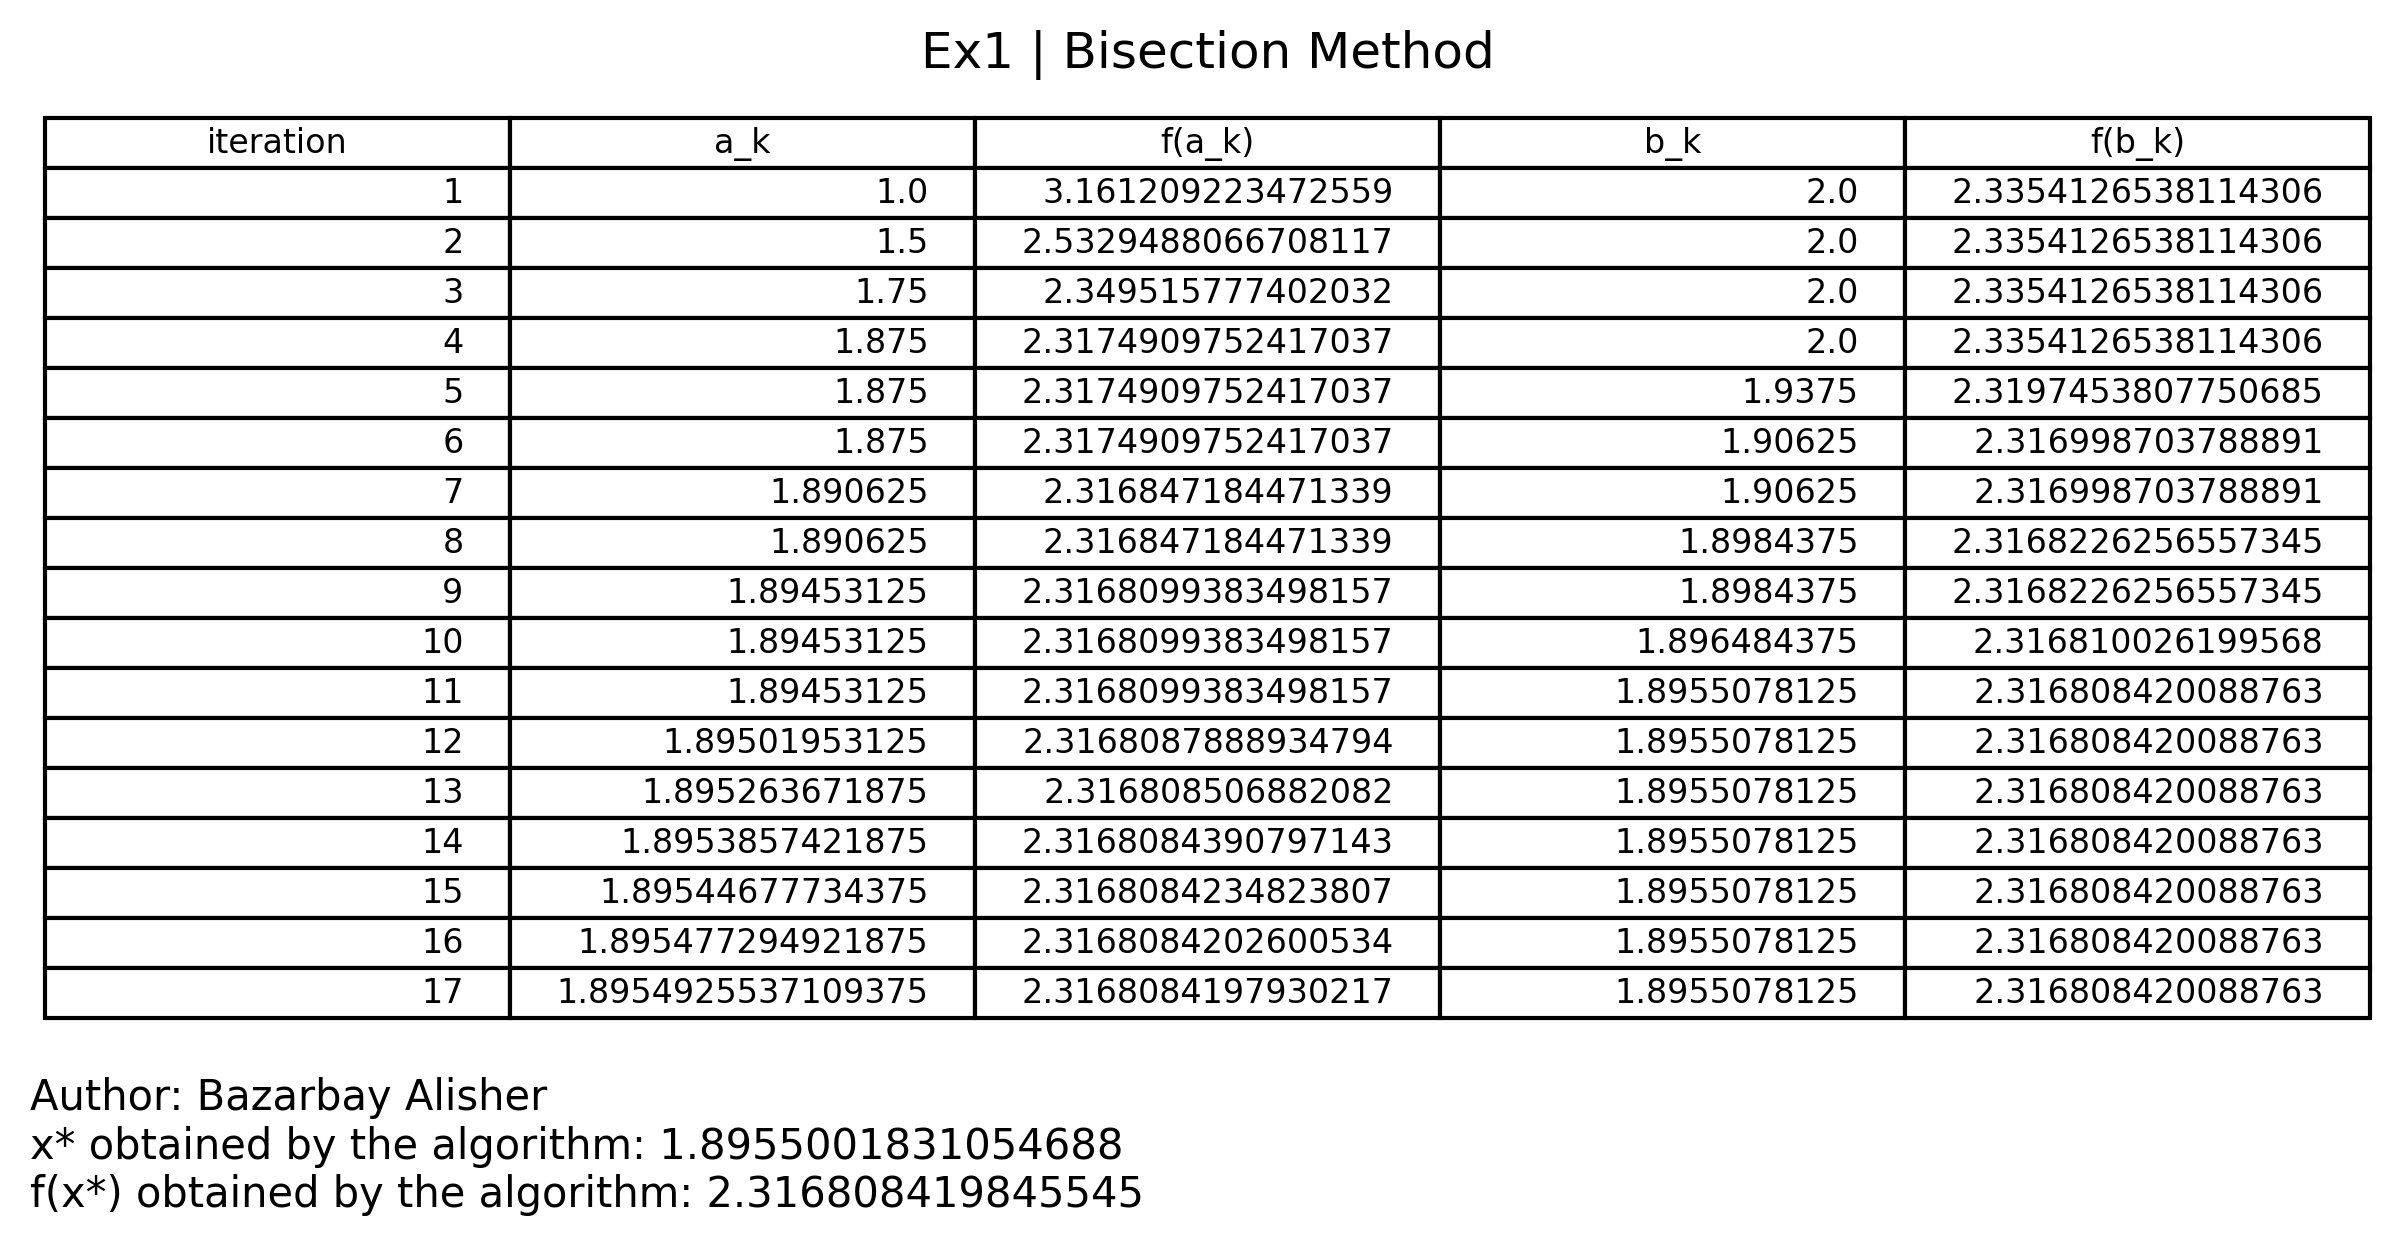

In [4]:
iteration = []
for i in range(len(ak)):
    iteration.append(str(i+1))
data = {'iteration': iteration,'a_k': ak,'f(a_k)': fa, 'b_k': bk, 'f(b_k)':fb} 
df = pd.DataFrame(data) 
df = df.head()
fig, ax =plt.subplots(figsize=(10,3), dpi = 300)

ax.axis('tight')
ax.axis('off')
the_table = ax.table(cellText=df.values,colLabels=df.columns,loc='center')
plt.title('Ex1 | Bisection Method', y=1.2)
plt.figtext(0.12, -0.2, "\nAuthor: Bazarbay Alisher" +
                        '\nx* obtained by the algorithm: {}'.format(result[0]) +
                        '\nf(x*) obtained by the algorithm: {}'.format(result[1]),fontsize=10, wrap=True)
pp = PdfPages("E1-1.pdf")
pp.savefig(fig, bbox_inches='tight')
pp.close()

* ***Newton’s method*** (Draw a table listing iteration 1 to 3, including $x_k$ , $f(x_k)$, $f'(x_k)$, $f''(x_k)$. Give $x^{*}$ and $f(x^{*})$ obtained by the algorithm.)

In [5]:
def newtonMethod(x0):
    maxIter=1000
    counter = 0
    epsilon = 10**(-5)
    x=x0
    fVal=orig(x0)
    
    xList=[x]
    fList=[fVal]
    fList_g1 = [gradient(x)]
    fList_g2 = [gradientSo(x)]

    for i in range(maxIter):
        counter += 1
        g = gradient(x)
        g2 = gradientSo(x)
        
        
        if abs(g)<epsilon:
            break
        
        parCon = g/g2
        
        
        if abs(g/g2)>10**4:
            print("Increase is too large. May diverge!")  
            break
        
        xNew=x-parCon
        fNew=orig(xNew) 
        
        x=xNew
        
        xList.append(xNew)
        fList.append(fNew)
        fList_g1.append(gradient(xNew))
        fList_g2.append(gradientSo(xNew))
        
        
        if i==maxIter-1:
            print("Maximum iteration number reached.")
        
        if abs(fNew)>=10**4:
            print("Function value f(x_k) is too large, may diverge!")
            break
            
    
    print("The minimizer x* obtained by the algorithm is: ",xList[-1])
    print("The minimum value f(x*) obtained by the algorithm is: ",orig(xList[-1]))
    print("The algorithm took ",counter," iterations to reach the stopping criteria.")
    
    return xList, fList, fList_g1, fList_g2, (xList[-1], orig(xList[-1]))

x0 = 1
x, f, f1, f2, result = newtonMethod(x0)            
        

The minimizer x* obtained by the algorithm is:  1.8954945666276892
The minimum value f(x*) obtained by the algorithm is:  2.3168084197883605
The algorithm took  13  iterations to reach the stopping criteria.


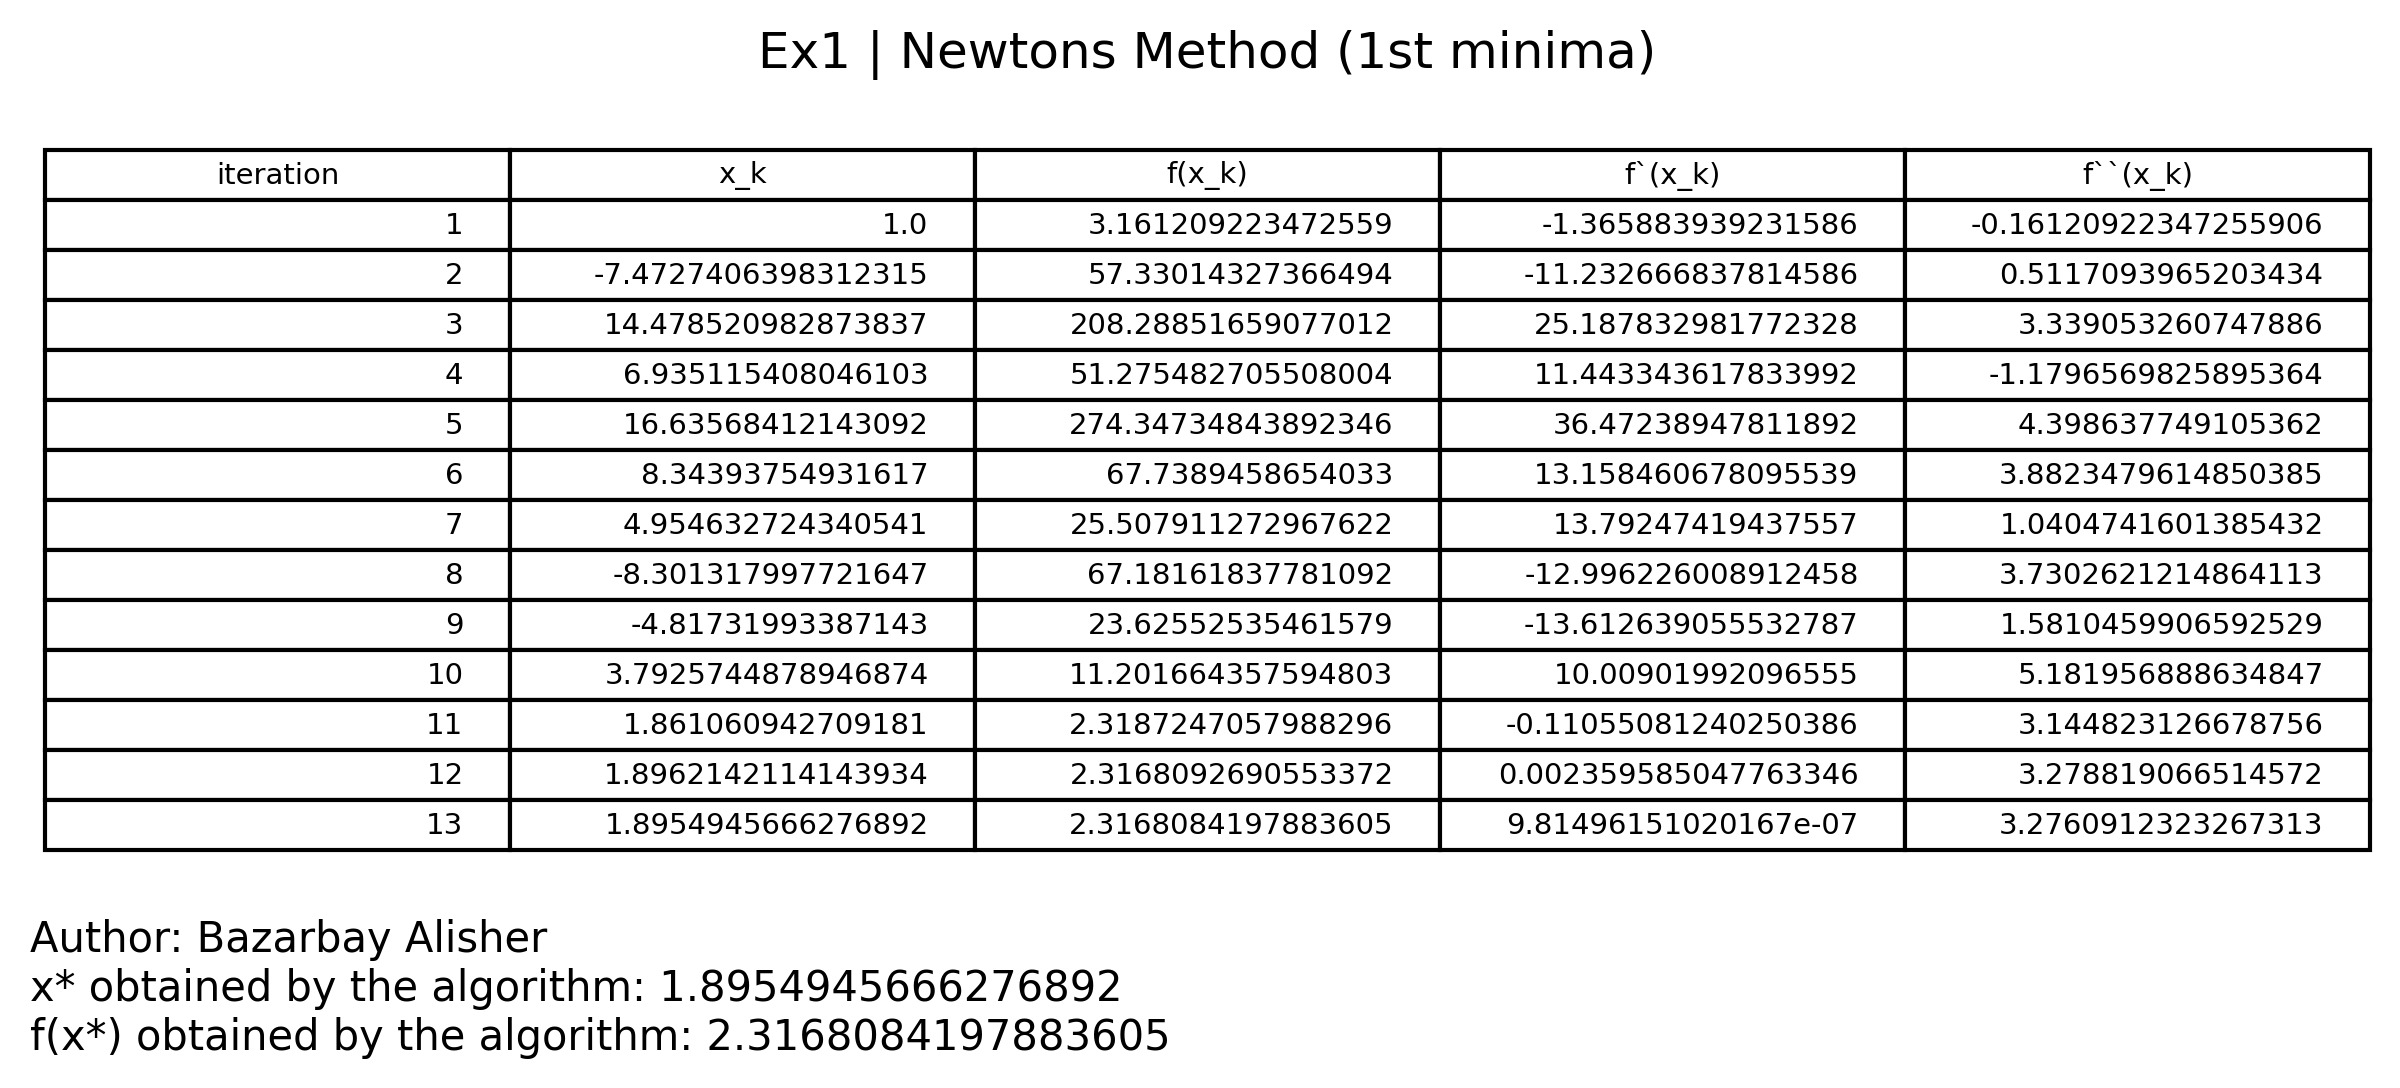

In [6]:
iteration = []
for i in range(len(x)):
    iteration.append(str(i+1))
data = {'iteration':iteration, 'x_k': x,'f(x_k)': f, 'f`(x_k)': f1, 'f``(x_k)':f2} 
df = pd.DataFrame(data) 
fig, ax =plt.subplots(figsize=(10,3), dpi = 300)

ax.axis('tight')
ax.axis('off')
the_table = ax.table(cellText=df.values,colLabels=df.columns,loc='center')
plt.title('Ex1 | Newtons Method (1st minima)', y=1.1)
plt.figtext(0.12, -0.1, "\nAuthor: Bazarbay Alisher" +
                        '\nx* obtained by the algorithm: {}'.format(result[0]) +
                        '\nf(x*) obtained by the algorithm: {}'.format(result[1]),fontsize=10, wrap=True)
pp = PdfPages("E1-2-1.pdf")
pp.savefig(fig, bbox_inches='tight')
pp.close()

## Actually, there are 2 local minima
So, lets run the algorithm again for x_0 = -1.

In [7]:
x0 = -1
x, f, f1, f2, result = newtonMethod(x0)

The minimizer x* obtained by the algorithm is:  -1.8954945666276892
The minimum value f(x*) obtained by the algorithm is:  2.3168084197883605
The algorithm took  13  iterations to reach the stopping criteria.


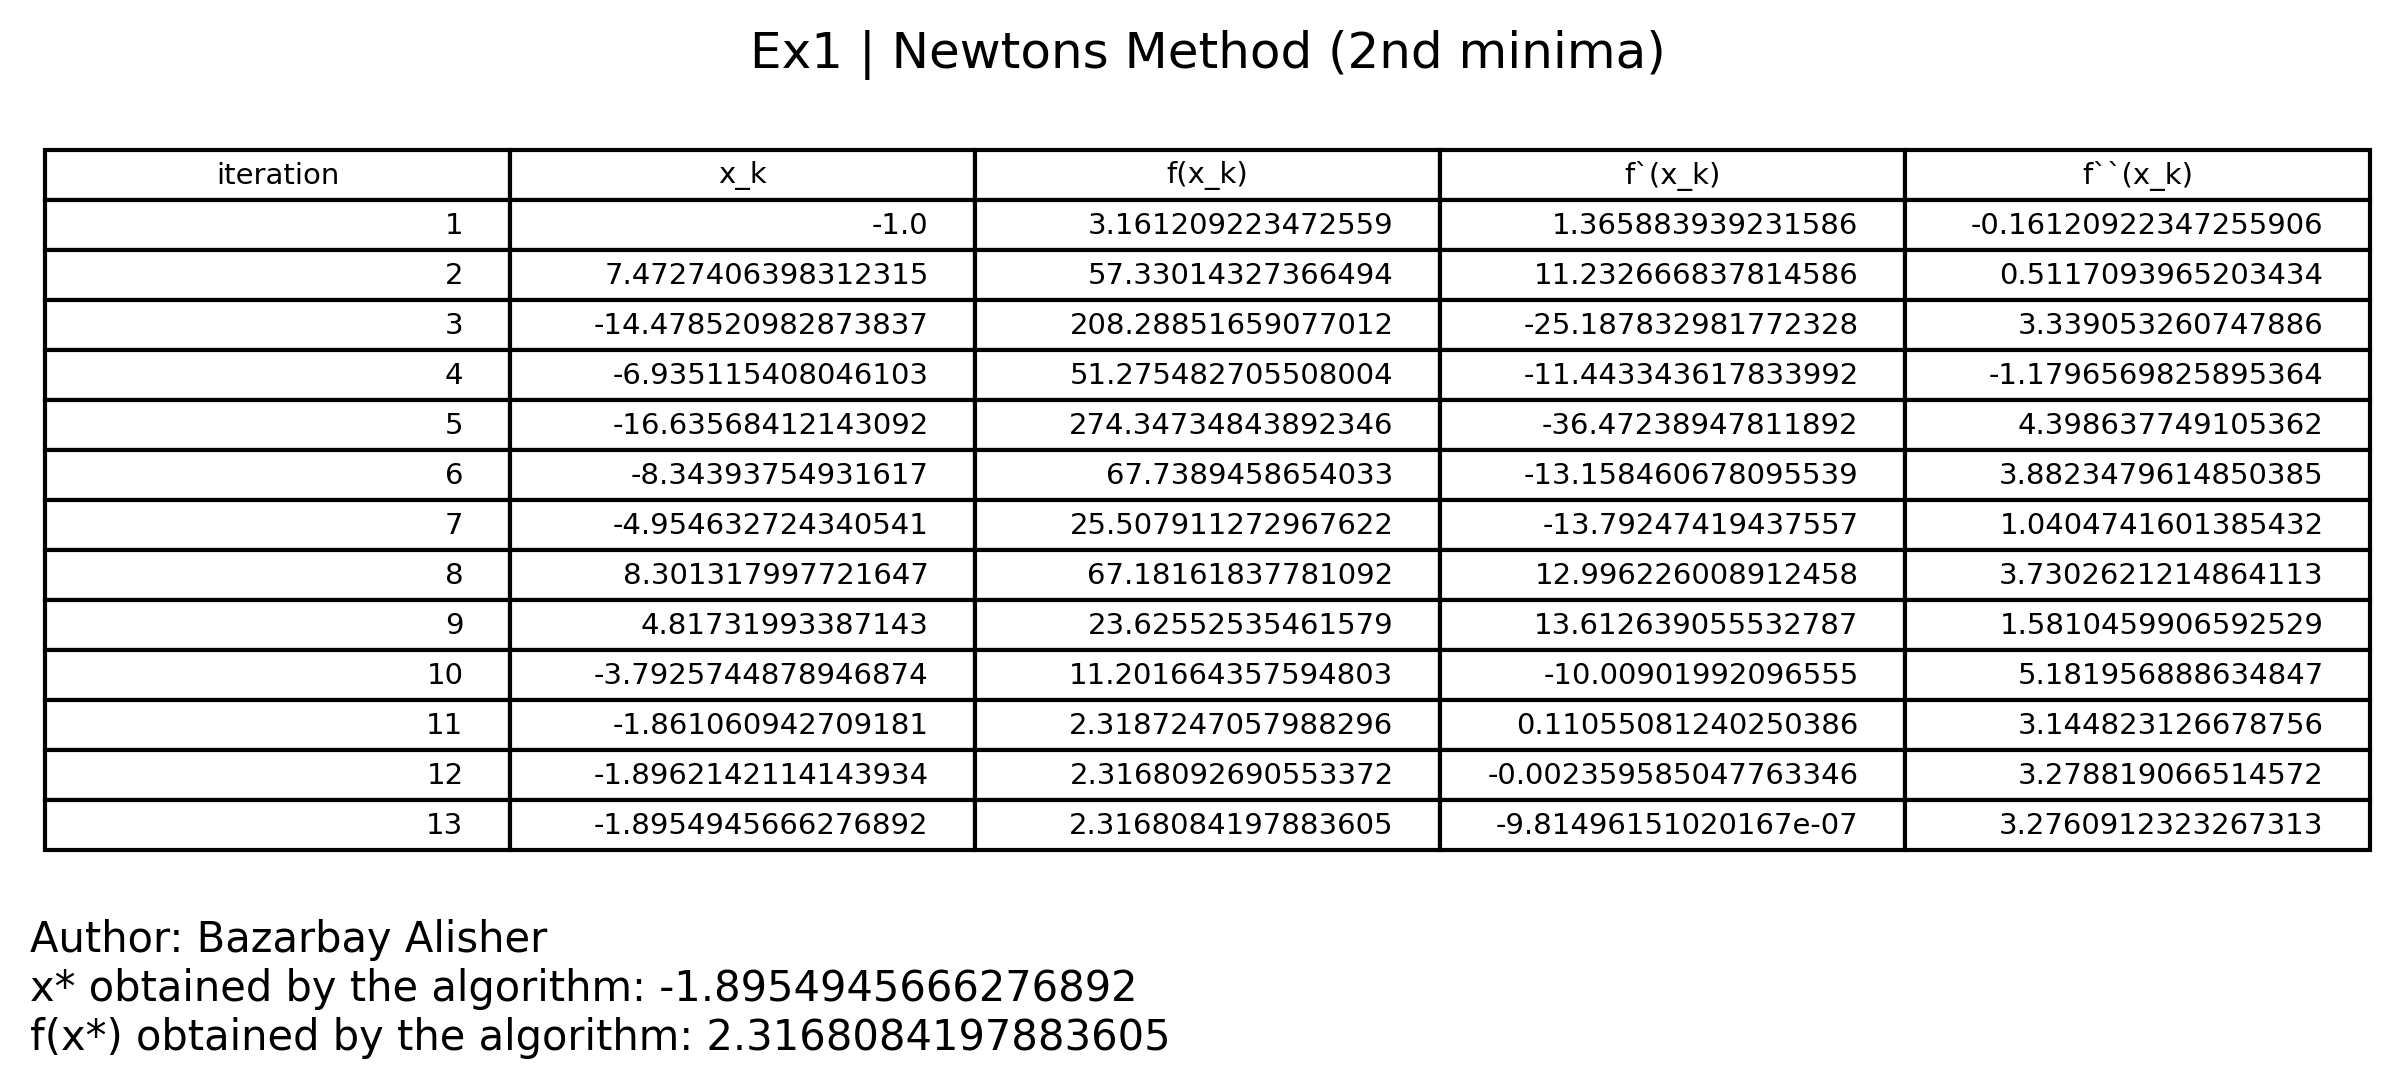

In [8]:
iteration = []
for i in range(len(x)):
    iteration.append(str(i+1))
data = {'iteration':iteration, 'x_k': x,'f(x_k)': f, 'f`(x_k)': f1, 'f``(x_k)':f2} 
df = pd.DataFrame(data) 
fig, ax =plt.subplots(figsize=(10,3), dpi = 300)

ax.axis('tight')
ax.axis('off')
the_table = ax.table(cellText=df.values,colLabels=df.columns,loc='center')
plt.title('Ex1 | Newtons Method (2nd minima)', y=1.1)
plt.figtext(0.12, -0.1, "\nAuthor: Bazarbay Alisher" +
                        '\nx* obtained by the algorithm: {}'.format(result[0]) +
                        '\nf(x*) obtained by the algorithm: {}'.format(result[1]),fontsize=10, wrap=True)
pp = PdfPages("E1-2-2.pdf")
pp.savefig(fig, bbox_inches='tight')
pp.close()

# Second exercise

Consider the function f : $R^2$ → $R$ given by
$f(x)$ = $3/2$($x_1^2$ + $x_2^2$)+ 3$x_1x_2$ - ($x_1 + x_2$) + 1 Find the minimizer using:

The above function can be rewritten as  $0.5x^T \left[ \begin{array}{cc}
3 & 3\\ 3 & 3 \end{array}\right]x + [-1,-1]^Tx + 1$ 

Where,
$\mathbf{Q}=1/2\left[ \begin{array}{cc}
3 & 3\\ 3 & 3 
\end{array}
\right], b=[-1,-1]^\top, c=1$

In [9]:
def quad(x,Q,a,b):
    return 1/2*np.dot(np.dot(x,Q),x)+np.dot(x,a)+b

def gradQuad(x,Q,a):
    return np.dot(Q,x)+a

def stepsizeSearch(x,Q,a):
    gradient = gradQuad(x,Q,a)
    return np.dot(gradient,gradient)/(np.dot(np.dot(gradient,Q),gradient))


* ***Gradient descent*** with exact line search (Draw a table listingng all the iterations, including $x_k$ , $f(x_k)$. Give $x^{*}$ and $f(x^{*})$ obtained by the algorithm).

In [17]:
def gradDescent_search(x_0,Q,a,b):
    
    maxIter=1000
    counter = 0
    x=x_0
    fVal=quad(x,Q,a,b)
    epsilon = 10**(-5)
    xList=[x]
    fList=[fVal]
    alphaList = []
    
    for i in range(maxIter):
        gradient = gradQuad(x,Q,a)
        counter += 1
        if np.linalg.norm(gradient)<epsilon:
            break
        
        alpha = stepsizeSearch(x,Q,a)
        alphaList.append(alpha)
        xNew=x-alpha*gradient
        
        if abs(alpha)>=10**4:
            print("Stepsize is large, may diverge!")
            break

        fNew=quad(xNew,Q,a,b)

        xList.append(xNew)
        fList.append(fNew)

        x = xNew
        
        if i==maxIter-1:
            print("Maximum iteration number reached.")
            
        if abs(fNew)>=10**4:
            print("Function value is too large, may diverge!")
            break

    print("The minimizer obtained by the algorithm is: ",xList[-1])
    print("The minimum value obtained by the algorithm is: ",fList[-1])
    print("The algorithm took ",counter," iterations to reach the stopping criteria.")

    return xList, fList

x_0=np.array([-350,75])
Q=np.array([[3,3],[3,3]])
a=np.array([-1,-1])
b=1


x, f = gradDescent_search(x_0,Q,a,b)

The minimizer obtained by the algorithm is:  [-212.33333333  212.66666667]
The minimum value obtained by the algorithm is:  0.8333333333333334
The algorithm took  2  iterations to reach the stopping criteria.


/shared-libs/python3.7/py/lib/python3.7/site-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


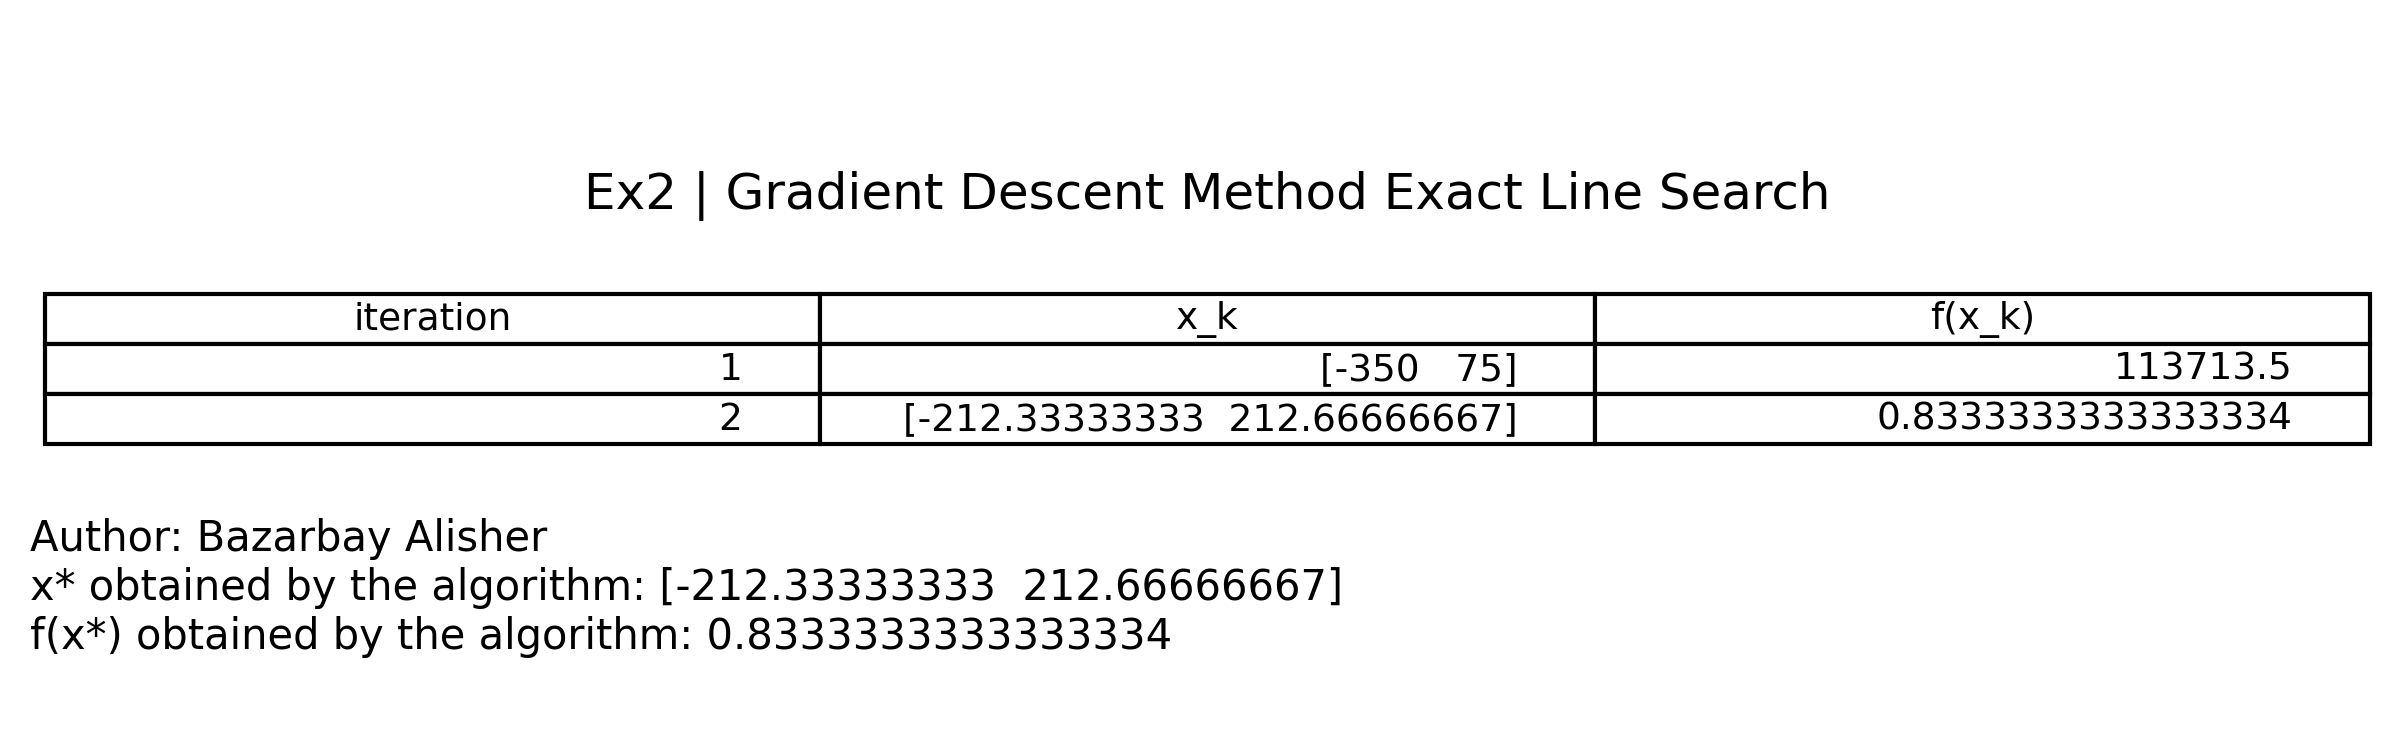

In [18]:
iteration = []
for i in range(len(x)):
    iteration.append(str(i+1))
data = {'iteration':iteration, 'x_k': x,'f(x_k)': f} 
df = pd.DataFrame(data) 
fig, ax =plt.subplots(figsize=(10,3), dpi = 300)
ax.axis('tight')
ax.axis('off')
the_table = ax.table(cellText=df.values,colLabels=df.columns,loc='center')
plt.title('Ex2 | Gradient Descent Method Exact Line Search', y=0.7)
plt.figtext(0.12, 0.2, "\nAuthor: Bazarbay Alisher" +
                        '\nx* obtained by the algorithm: {}'.format(x[-1]) +
                        '\nf(x*) obtained by the algorithm: {}'.format(f[-1]),fontsize=10, wrap=True)
pp = PdfPages("E2-1.pdf")
pp.savefig(fig, bbox_inches='tight')
pp.close()

* ***Fixed-step-size gradient descent*** with exact line search (Pick a proper step size and give the reason. Draw a table listingng all the iterations, including $x_k$ , $f(x_k)$. Give $x^{*}$ and $f(x^{*})$ obtained by the algorithm).

In [29]:
def gradDescent_fixed(x_0,Q,a,b,alpha):
    if abs(alpha)>=10**4:
        print("Stepsize is large, may diverge!")
        return
    maxIter=1000
    counter = 0
    x = x_0
    fVal=quad(x,Q,a,b)
    epsilon = 10**(-5)
    xList=[x]
    fList=[fVal]
    
    for i in range(maxIter):
        gradient = gradQuad(x,Q,a)
        counter += 1
        if np.linalg.norm(gradient)<epsilon:
            break
        
        xNew=x-alpha*gradient
        


        fNew=quad(xNew,Q,a,b)
        xList.append(xNew)
        fList.append(fNew)

        x = xNew
        
        if i==maxIter-1:
            print("Maximum iteration number reached.")
            
        if abs(fNew)>=10**4:
            print("Function value is too large, may diverge!")
            break

    print("The minimizer obtained by the algorithm is: ",xList[-1])
    print("The minimum value obtained by the algorithm is: ",fList[-1])
    print("The algorithm took ",counter," iterations to reach the stopping criteria.")

    return xList, fList

x_0 = np.array([1,1])
Q = np.array([[3,3],[3,3]])
a = np.array([-1,-1])
b = 1
alpha = 0.1 #optimal
x, f = gradDescent_fixed(x_0,Q,a,b, alpha)

The minimizer obtained by the algorithm is:  [0.16666756 0.16666756]
The minimum value obtained by the algorithm is:  0.8333333333381372
The algorithm took  16  iterations to reach the stopping criteria.


/shared-libs/python3.7/py/lib/python3.7/site-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


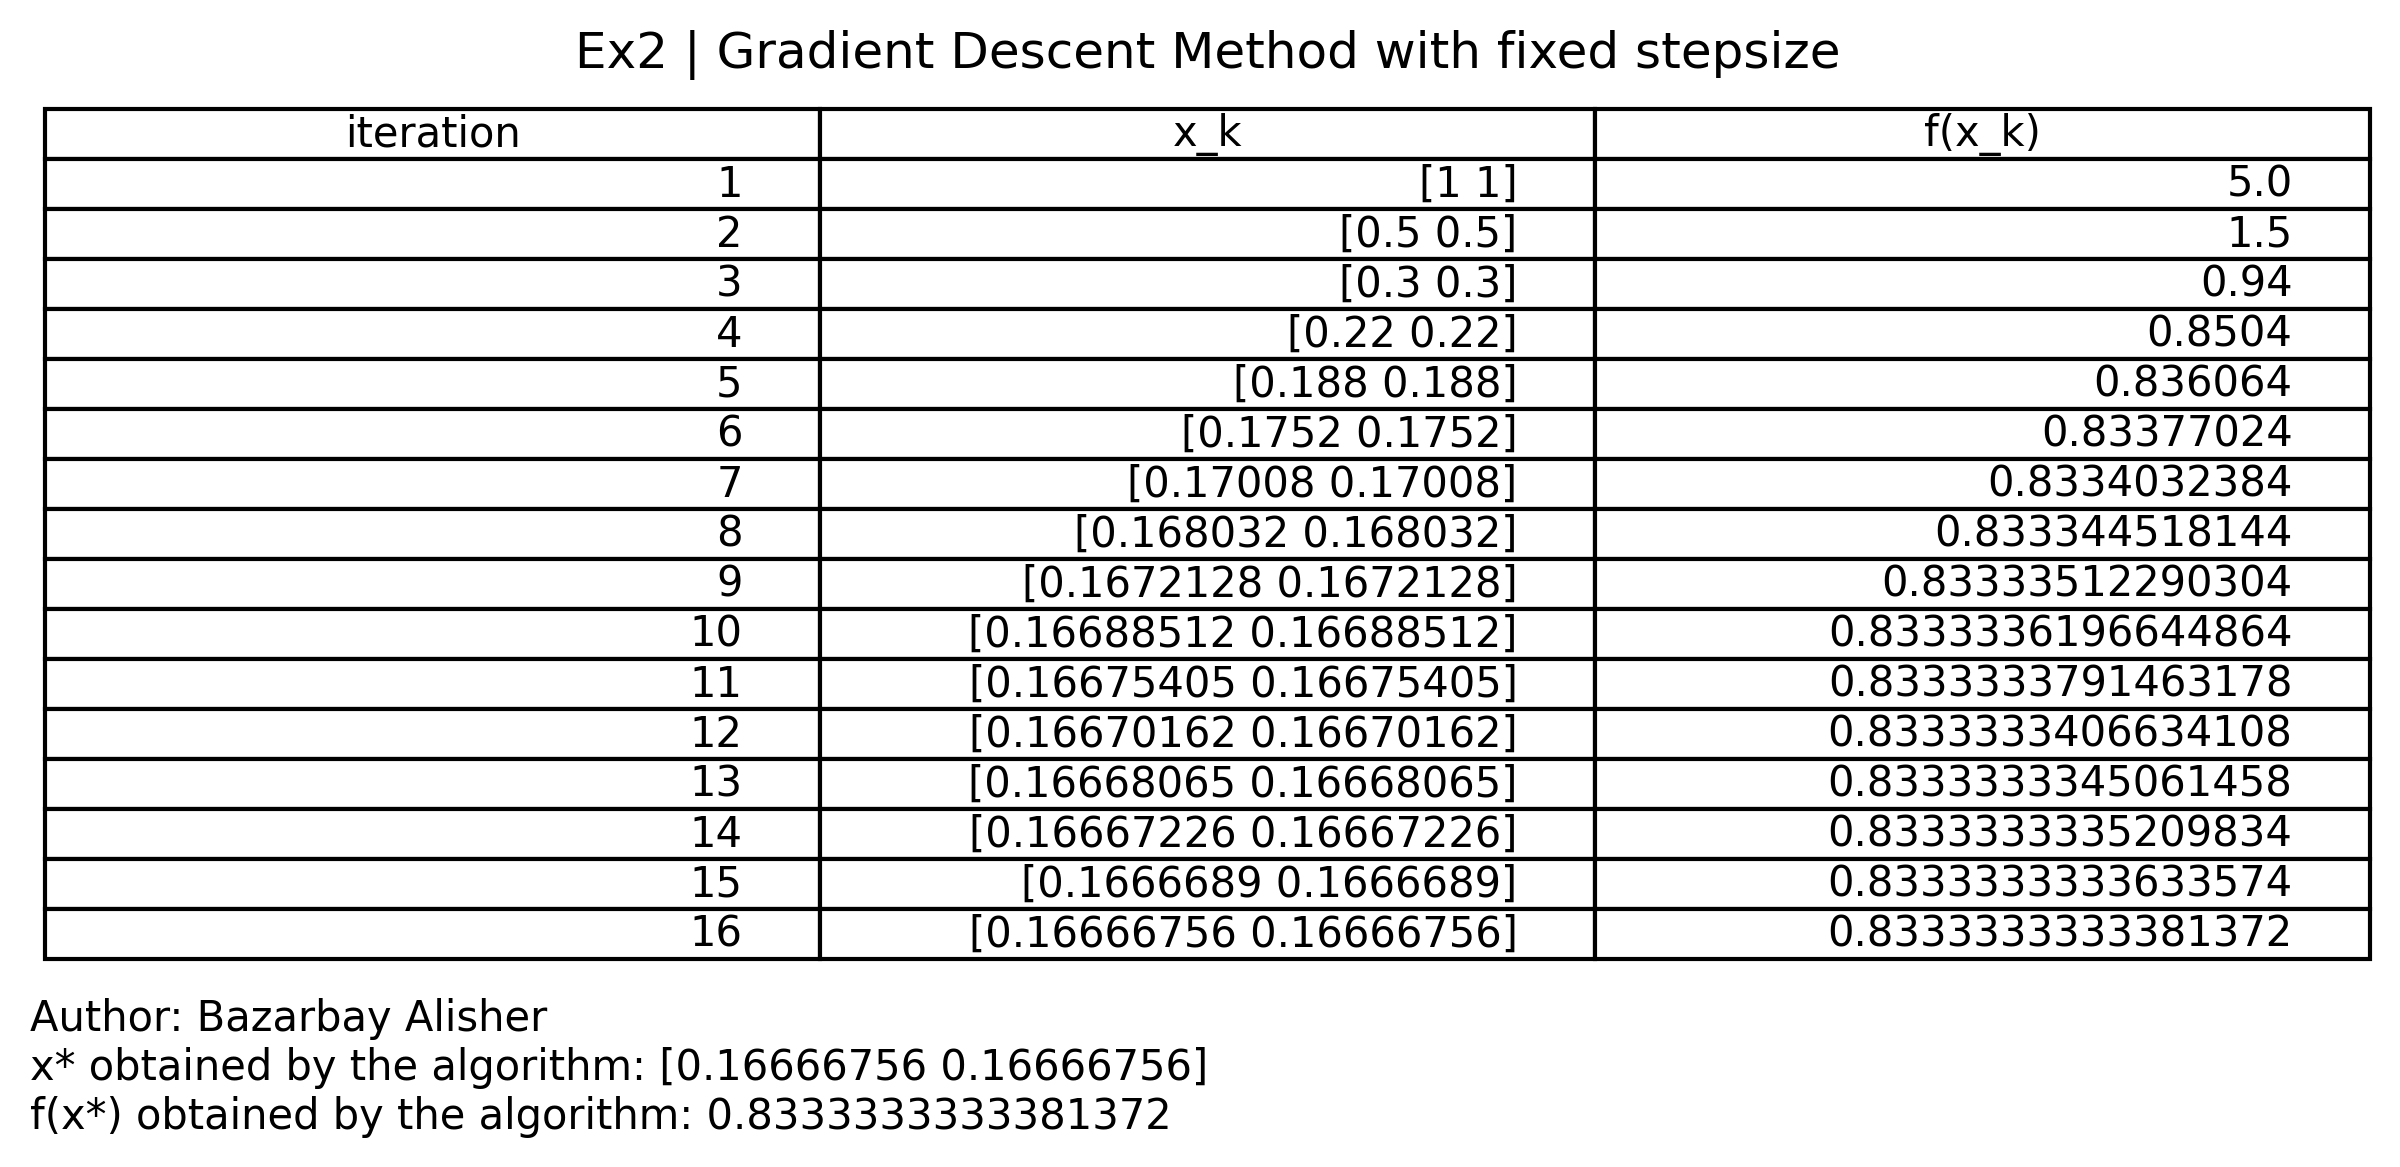

In [30]:
iteration = []
for i in range(len(x)):
    iteration.append(str(i+1))
data = {'iteration':iteration, 'x_k': x,'f(x_k)': f} 
df = pd.DataFrame(data) 
fig, ax =plt.subplots(figsize=(10,3), dpi = 300)

ax.axis('tight')
ax.axis('off')
the_table = ax.table(cellText=df.values,colLabels=df.columns,loc='center')
plt.title('Ex2 | Gradient Descent Method with fixed stepsize', y=1.15)
plt.figtext(0.12, -0.15, "\nAuthor: Bazarbay Alisher" +
                        '\nx* obtained by the algorithm: {}'.format(x[-1]) +
                        '\nf(x*) obtained by the algorithm: {}'.format(f[-1]),fontsize=10, wrap=True)
pp = PdfPages("E2-2.pdf")
pp.savefig(fig, bbox_inches='tight')
pp.close()

### Actually min(f(x)) = 5/6 ~ 0.8(3) for y = 1/3 - x

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=50b6f1fe-39c1-401d-9748-c189fba3e79d' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>